In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
import seaborn as sns
import random

<img src='https://dl.dropboxusercontent.com/u/39642509/veg_monitor.jpg' width=500px style='display:inline'>
<img src='https://dl.dropboxusercontent.com/u/39642509/veg_monitor_2.jpg' width='400px' style='display:inline'>

### columns:

**Site-YearCode, Transect, Point, Height , Species, Plant code, Native Status, Life History, Stature**



Exotic plant cover to 15%
Maintain >75% cover in native dune scrub and coastal scrub vegetation


In [2]:
from define_column import define_column

In [3]:
define_column('Stature')

In other studies this grouping has been called “guild.” 

In this study the choices are forb*, grass, rush/sedge, shrub, or tree.

*A forb is a soft-bodied plant that does not make a woody stem.


In [4]:
df = pd.read_csv('./landsend_veg_2007_2012.csv')
print df.shape

(3591, 9)


In [5]:
df['Site'] = df['Site-YearCode'].apply(lambda x: x.split('-')[0])
df['Year'] = df['Site-YearCode'].apply(lambda x: int(x.split('-')[1]))

In [6]:
df.head()

,Site-YearCode,Transect,Point,Height,Species,Plant code,Native Status,Life History,Stature,Site,Year
0,NUWO-2012,5,90,Low,-,-,-,-,-,NUWO,2012
1,NUWO-2012,13,150,Low,-,-,-,-,-,NUWO,2012
2,NMS-2010,8,20,Low,Achillea millefolium,ACMI,Native,Perennial,Forb,NMS,2010
3,NMS-2010,24,4,Low,Achillea millefolium,ACMI,Native,Perennial,Forb,NMS,2010
4,NMS-2010,48,16,Low,Achillea millefolium,ACMI,Native,Perennial,Forb,NMS,2010


In [7]:
print 'total rows:', len(df)
print '\n# null values: '
print df.isnull().sum()
print '\n% null values:'
print df.isnull().sum()/len(df)*100

total rows: 3591

# null values: 
Site-YearCode       0
Transect            0
Point               1
Height              0
Species             0
Plant code       1019
Native Status    1621
Life History     1790
Stature          1790
Site                0
Year                0
dtype: int64

% null values:
Site-YearCode     0.000000
Transect          0.000000
Point             0.027847
Height            0.000000
Species           0.000000
Plant code       28.376497
Native Status    45.140629
Life History     49.846839
Stature          49.846839
Site              0.000000
Year              0.000000
dtype: float64


In [9]:
import json

with open('ideal_mix.json','r') as infile:
    ideal_mix = json.load(infile)
    

In [12]:
pprint(ideal_mix)


{u'Armeria maritima': 0.11,
 u'Artemisia pycnocephala': 0.06,
 u'Baccharis pilularis': 0.01,
 u'Castilleja affinis': 0.1,
 u'Dudleya farinosa': 0.05,
 u'Ericameria ericoides': 0.15,
 u'Erigeron glaucus': 0.05,
 u'Eriogonum latifolium': 0.05,
 u'Eriophyllum staechadifolium': 0.05,
 u'Fragaria chiloensis': 0.05,
 u'Lotus scoparius': 0.05,
 u'Lupinus chamissonis': 0.05,
 u'Poa douglasii': 0.11,
 u'Polygonum paronychia': 0.05,
 u'Tanacetum camphoratum': 0.05}


In [16]:
sududf = df[df.Site == 'SUDU']
sududf.head()

,Site-YearCode,Transect,Point,Height,Species,Plant code,Native Status,Life History,Stature,Site,Year
1984,SUDU-2008,7,15,Low,Abronia latifolia,NaN,NaN,NaN,NaN,SUDU,2008
1985,SUDU-2008,9,12,Low,Abronia latifolia,NaN,NaN,NaN,NaN,SUDU,2008
1986,SUDU-2008,10,8,Low,Abronia latifolia,NaN,NaN,NaN,NaN,SUDU,2008
1987,SUDU-2008,11,13,Low,Abronia latifolia,NaN,NaN,NaN,NaN,SUDU,2008
1988,SUDU-2008,11,14,Low,Abronia latifolia,NaN,NaN,NaN,NaN,SUDU,2008


In [27]:
# number of observations by year at SUDU
dd = df.groupby(['Site','Year']).count()
dd['Num_Rows'] = dd['Site-YearCode']
data_counts = dd[['Num_Rows']]

In [28]:
data_counts

Num_Rows
Site Year          
EAPO 2011       390
NMS  2010       247
     2011       175
     2012       335
NUWO 2010       320
     2011       115
     2012       402
SUDU 2008       498
     2009       505
     2010       222
     2011       177
     2012       200
     2013         5

In [32]:
df[df.Year == 2013]

,Site-YearCode,Transect,Point,Height,Species,Plant code,Native Status,Life History,Stature,Site,Year
3417,SUDU-2013,28,56,L,Bromus diandrus,BRDI,NaN,NaN,NaN,SUDU,2013
3438,SUDU-2013,28,0,L,Erigeron glaucus,ERGL,x,NaN,NaN,SUDU,2013
3516,SUDU-2013,28,49,L,Fragaria chiloensis,FRCH,x,NaN,NaN,SUDU,2013
3529,SUDU-2013,28,14,L,Lupinus arboreus,LUAR,x,NaN,NaN,SUDU,2013
3530,SUDU-2013,28,14,M,Lupinus arboreus,LUAR,x,NaN,NaN,SUDU,2013


In [ ]:
df[['Site','Year']]

In [149]:
a = df[(df.Site == 'SUDU') & (df.Year == 2012)].sort_values(by=['Transect','Point','Height '])
#a['Plant code'] = a['Plant code'].fillna('(bare ground)')
a['Native Status'] = a['Native Status'].map({np.nan:0, 'x':1})
a.head()

,Site-YearCode,Transect,Point,Height,Species,Plant code,Native Status,Life History,Stature,Site,Year
3447,SUDU-2012,7,0,L,Eriophyllum staechadifolium,ERST,1,NaN,NaN,SUDU,2012
3448,SUDU-2012,7,0,M,Eriophyllum staechadifolium,ERST,1,NaN,NaN,SUDU,2012
3539,SUDU-2012,7,0,M,Marah fabaceus,MAFA,1,NaN,NaN,SUDU,2012
3449,SUDU-2012,7,7,L,Eriophyllum staechadifolium,ERST,1,NaN,NaN,SUDU,2012
3559,SUDU-2012,7,7,L,Rumex Salicifolius,RUSA,1,NaN,NaN,SUDU,2012


In [155]:
points_rows = a[['Transect','Point','Species']].groupby(['Transect','Point']).groups
deduped_plants = []
s = a['Species']

for group in points_rows.keys():
    deduped_plants = deduped_plants + list(s.loc[points_rows[group]].unique())
deduped_plants = pd.Series(deduped_plants)

In [160]:
deduped_counts = deduped_plants.value_counts()
species_proportions = deduped_counts/deduped_counts.sum()

In [162]:
species_proportions[ideal_species]

Artemisia pycnocephala         0.066265
Fragaria chiloensis            0.048193
Lupinus chamissonis            0.012048
Dudleya farinosa                    NaN
Poa douglasii                       NaN
Eriophyllum staechadifolium    0.228916
Armeria maritima                    NaN
Polygonum paronychia                NaN
Tanacetum camphoratum          0.012048
Castilleja affinis             0.006024
Lotus scoparius                     NaN
Baccharis pilularis                 NaN
Eriogonum latifolium           0.024096
Ericameria ericoides                NaN
Erigeron glaucus               0.030120
dtype: float64

In [118]:
data_species = set(a.Species.unique())
ideal_species = set(im.keys())

ideal_species.intersection(data_species)
pprint( ideal_species.difference(data_species) )
pprint( sorted(list(data_species)) )

set([u'Armeria maritima',
     u'Baccharis pilularis',
     u'Dudleya farinosa',
     u'Ericameria ericoides',
     u'Lotus scoparius',
     u'Poa douglasii',
     u'Polygonum paronychia'])
['Abronia latifolia',
 'Achillea millefolium',
 'Albizia lophantha',
 'Ambrosia chamissonis',
 'Artemisia californica ',
 'Artemisia pycnocephala',
 'Avena barbada',
 'Baccharius pilularis',
 'Bare ground',
 'Bromus Carinatus',
 'Bromus diandrus ',
 'Bromus hordeaceus',
 'Castilleja affinis',
 'Claytonia perfoliata',
 'Ehrharta erecta',
 'Erigeron glaucus',
 'Eriogonum latifolium',
 'Eriophyllum staechadifolium',
 'Eschscholzia californica',
 'Festuca rubra',
 'Fragaria chiloensis',
 'Fumaria parviflora',
 'Grindelia hirsutula',
 'Log',
 'Lupinus arboreus',
 'Lupinus chamissonis',
 'Malva neglecta',
 'Marah fabaceus',
 'Melilotus indica',
 'Mimulus aurantiacus',
 'Oxalis incarnata',
 'Rubus ursinus',
 'Rumex Salicifolius',
 'Satureja douglasii',
 'Scrophularia californica',
 'Solanum',
 'Sonchus ole

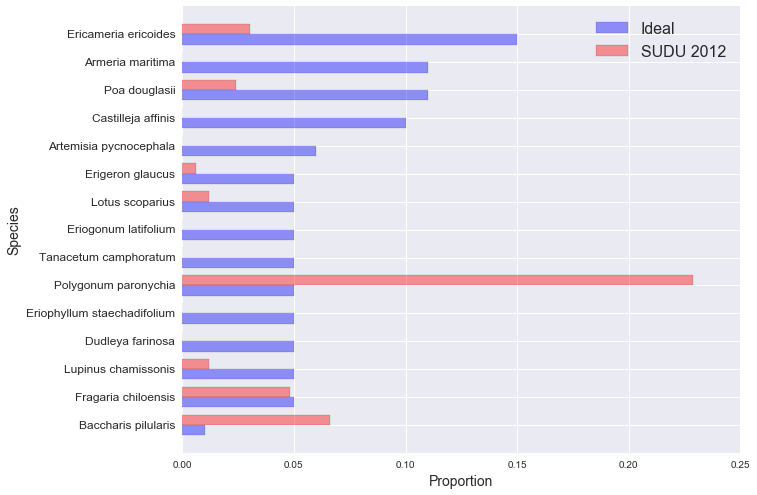

In [206]:
# plotting empirical vs ideal mix of species

im = ideal_mix
ims = sorted(im.items(), key=lambda x: x[1])
species, amts = zip(*ims)

#~~

n_groups = len(ims)
ideals = amts

sudu2012 = species_proportions[ideal_species].fillna(0)
fig, ax = plt.subplots(figsize=(10,8))

index = np.arange(1,n_groups+1)
bar_width = 0.37
opacity = 0.4

rects1 = plt.barh(index - bar_width, ideals, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ideal')
rects2 = plt.barh(index, sudu2012, bar_width,
                 alpha=opacity,
                 color='r',
                 label='SUDU 2012')

plt.ylabel('Species',fontsize=14)
plt.xlabel('Proportion', fontsize=14)
#plt.title('')
ax.set_yticks(index)
ax.set_yticklabels(species, fontsize=12)
plt.legend(fontsize=16)
print

#~~

#plt.figure(figsize=(12,6))
#plt.bar(range(len(amts)),amts)

In [273]:
html  = '<html><head><link rel="stylesheet" href="http://yui.yahooapis.com/pure/0.6.0/pure-min.css"></head>'
html += '<h3>Species in sample not in ideal mix (SUDU 2012):</h3>'
ex = species_proportions[set(deduped_plants).difference(ideal_species)].sort_values(ascending=False)

yearsite = 'SUDU-2011'
pagename = '%s_report.html' % (yearsite.lower())

percent_fmt = lambda x: '%0.2f%%' % (x*100)

hdf = pd.DataFrame(ex,columns=['pct'])
#print hdf.head()
table_out = hdf.to_html(header=False, bold_rows=False, formatters={'pct':percent_fmt})
#print table_out
_,table_text = table_out.split('<tbody>')

with open('template.html','r') as infile:
    html = infile.read() 
    
page_links = "<span><a href='./%s'>%s</a></span>" % (pagename,yearsite)


    
html = html.replace('{{ yearsite }}', yearsite).replace('{{ table }}', table_text)
html = html.replace('{{ page_links }}', page_links)
print html
    
with open(pagename,'w') as htmlfile:
    htmlfile.write(html)

# with open('html_tabletest.html','w') as outfile:
#    outfile.write(table_out)

<html>

  <head>
    <link rel="stylesheet" href="http://yui.yahooapis.com/pure/0.6.0/pure-min.css">
    <link href='https://fonts.googleapis.com/css?family=Open+Sans:400,600' rel='stylesheet' type='text/css'>
    <style>
      div.main{
        padding: 1em;
      }

      html, button, input, select, textarea,
      .pure-g [class *= "pure-u"] {
        font-family: 'Open Sans', sans-serif;
      }
    </style>

  </head>

  <body>
    <div class='main pure-g'>

      <div class='pure-u-1 top-matter'>
        <h1>golden gate parks conservancy scrub mix</h1>
      </div>

      <div class='pure-u-1 link-box'>
        <span><a href='./sudu-2011_report.html'>SUDU-2011</a></span>
      </div>

      <div class='pure-u-3-5 graph-container'>
        <h3>Ideal and Observed Scrub Mix:</h3>
        <img class='pure-img' src='img/ideal_observed_plot_SUDU-2011.png'>
      </div>

      <div class='pure-u-2-5 table-container'>
      <h3 id='table-title'>Other Species in Sample:</h3>

      <tabl

In [211]:
set(species_proportions.index)

{'Abronia latifolia',
 'Achillea millefolium',
 'Albizia lophantha',
 'Ambrosia chamissonis',
 'Artemisia californica ',
 'Artemisia pycnocephala',
 'Avena barbada',
 'Baccharius pilularis',
 'Bare ground',
 'Bromus Carinatus',
 'Bromus diandrus ',
 'Bromus hordeaceus',
 'Castilleja affinis',
 'Claytonia perfoliata',
 'Ehrharta erecta',
 'Erigeron glaucus',
 'Eriogonum latifolium',
 'Eriophyllum staechadifolium',
 'Eschscholzia californica',
 'Festuca rubra',
 'Fragaria chiloensis',
 'Fumaria parviflora',
 'Grindelia hirsutula',
 'Log',
 'Lupinus arboreus',
 'Lupinus chamissonis',
 'Malva neglecta',
 'Marah fabaceus',
 'Melilotus indica',
 'Mimulus aurantiacus',
 'Oxalis incarnata',
 'Rubus ursinus',
 'Rumex Salicifolius',
 'Satureja douglasii',
 'Scrophularia californica',
 'Solanum',
 'Sonchus oleraceus',
 'Stellaria media',
 'Tanacetum camphoratum',
 'Vulpia bromoides',
 'dead tree stump'}